# VESIcal at vVMSG 2022
Simon Matthews (University of Iceland) & Penny Wieser (Oregon State University)
## 05 - The importance of CO$_2$ for saturation pressures in arcs

In addition to the bread and butter volatile calculations we have shown you so far, VESIcal's flexibility is ideal for tackling more complex questions. Here we go through an overview of how VESIcal helped to assess some of the issues with applying volatile solubility models to identifying the pressures of magma storage beneath arc volcanoes.

First, import the required python libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import VESIcal as v

### Exercise 05.01 - Give pyMelt a magma composition
We will use the composition of a melt inclusion from Fuego with 4 wt% H$_2$O. For now we will assume there is zero CO$_2$ in the inclusion:

In [ ]:
fuego = v.Sample({'SiO2':  49.67,
                  'TiO2':   1.17,
                  'Al2O3': 16.50,
                  'Fe2O3':  1.65,
                  'FeO':    8.43,
                  'MnO':    0.19,
                  'MgO':    4.38,
                  'CaO':    7.90,
                  'Na2O':   3.37,
                  'K2O':    0.79,
                  'P2O5':   0.22,
                  'CO2':    0.00,
                  'H2O':    4.00})

### Exercise 05.02 - Calculate a H$_2$O (only) saturation pressure
Let's calculate the saturation pressure! This might reflect a circumstance where we have identified the H$_2$O content using plagioclase hygrometry, but we don't have an estimate for the CO$_2$ content:

In [ ]:
SatP_noCO2 = v.calculate_saturation_pressure(sample=fuego, temperature=1000)
SatP_noCO2.result

### Exercise 05.03 - Adding in CO$_2$ after a trip to the SIMS
Assuming we now know what the CO$_2$ content of the inclusion is, how does this affect our knowledge of the saturation pressure? Let's say we measure 1000 ppmw on the SIMS.

First we can update the sample composition:

In [ ]:
fuego.change_composition({'CO2': 1000/1e4})
fuego.get_composition()

We don't need to redefine the sample, but if you were to go back to the first calculation, it will now use the *updated* sample composition and print over the first value.

Now we can repeat the calculation:

In [ ]:
SatP_CO2 = v.calculate_saturation_pressure(sample=fuego, temperature=1000)
SatP_CO2.result

Notice the **big** difference! Is this as bad as it could get?

### Exercise 05.04 - Adding more CO$_2$ after a trip to the Raman
Often the CO$_2$ we see dissolved in the glass is only a fraction of the total CO$_2$ budget the melt inclusion had at entrapment. Hopefully the rest is stored in a vapour bubble within the inclusion. If we measure the CO$_2$ vapour density, and the relative volumes of the bubble and inclusion, we can add this CO$_2$ budget back in.

After doing these calculations, lets say we find there is an extra 2000 ppmw present in the bubble:

In [ ]:
fuego.change_composition({'CO2': 1000/1e4 + 2000/1e4})
fuego.get_composition()

What does this mean for the saturation pressure?

In [ ]:
SatP_CO2 = v.calculate_saturation_pressure(sample=fuego, temperature=1000)
SatP_CO2.result

*EEEEEEK...* Time to get acquanted with the Raman...

### Appendix
When Penny did the calculations to assess this effect for VESIcal Part II, she used the **power of python** to automate the calculations. We didn't have you do this here because it takes some time for the computer to iterate through every calculation (but this is time you can spend doing something else!).

<img src="https://imgs.xkcd.com/comics/compiling.png">

Cartoon from XKCD. Using python means we don't have to compile the code- but sometimes we have to wait for a while to get our results...

To make this work Penny used for loops (which we introduced earlier). All of the calculations required to reproduce the figures in VESIcal II are available on github (https://github.com/PennyWieser/VESIcal_II), but to give you a preview of what this code looks like, here is the calculation for investigating the effect of adding between 0 and 5000 ppmw CO$_2$ to a fixed melt composition (Lowell Moore, Fuego):

In [17]:
import warnings as w
# Set up an array of CO2 contents. Here, have hand-typed to get a good spacing, could do with linspaces
CO2=np.array([0, 0.001, 0.002, 0.003, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
# In python, your life is easiest if you set up empty containers tolater fill in
Psat_Fuego_MagmaSat_2=np.empty(len(CO2), dtype=float)
Psat_Fuego_Dixon_2=np.empty(len(CO2), dtype=float)
Psat_Fuego_Shish_2=np.empty(len(CO2), dtype=float)
Psat_Fuego_IM_H_2=np.empty(len(CO2), dtype=float)
Psat_Fuego_IM_A_2=np.empty(len(CO2), dtype=float)

# I'm just turning warnings off here as i'm likely to trigger calibration warnings
with w.catch_warnings():
    w.simplefilter('ignore')
    
    # Now, we loop through each CO2 content
    for i in range(0, len(CO2)):


    # EAch time through the loop, CO2 in the sample gets replaced with the CO2 from the np.array
        Fuego =v.Sample({'SiO2': 49.67,
     'TiO2':     1.17,
     'Al2O3':    16.50,
     'Fe2O3':     1.653168,
     'FeO':       8.432,
     'MnO': 0.185898241,
     'MgO':      4.380435345,
     'CaO':      7.901059264,
     'Na2O':      3.372092032,
     'K2O':       0.79127506,
    'P2O5':     0.22,
    'CO2': CO2[i],
    'H2O': 2}, default_normalization='none')
        # Then calculate PSat for each loop using diferent models
        Psat_Fuego_MagmaSat_2[i]=v.calculate_saturation_pressure(sample=Fuego,  temperature=1000).result
        Psat_Fuego_IM_H_2[i]=v.calculate_saturation_pressure(sample=Fuego, model='IaconoMarziano',  temperature=1000).result
        Psat_Fuego_IM_A_2[i]=v.calculate_saturation_pressure(sample=Fuego, model='IaconoMarziano',  coeffs="anhydrous",  temperature=1000).result
        Psat_Fuego_Dixon_2[i]=v.calculate_saturation_pressure(sample=Fuego, model='Dixon',  temperature=1000).result
        Psat_Fuego_Shish_2[i]=v.calculate_saturation_pressure(sample=Fuego, model='ShishkinaIdealMixing',  temperature=1000).result

Magmasat has a resolution of 10 MPa, can cause bounciness, so we perform a polynomial fit:

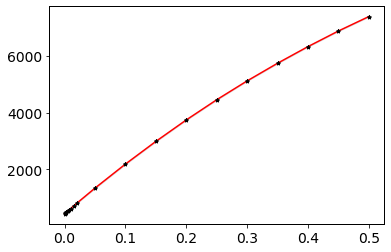

In [18]:
plt.fill_between(CO2, Psat_Fuego_MagmaSat_2-10, Psat_Fuego_MagmaSat_2+10, color='grey', alpha=0.2)
Pf_Magmasat_2 = np.poly1d(np.polyfit(CO2[0:],  Psat_Fuego_MagmaSat_2[0:], 8))
Px_new_Magmasat_2 = CO2
Py_new_Magmasat_2 = Pf_Magmasat_2(Px_new_Magmasat_2)
plt.plot(Px_new_Magmasat_2, Py_new_Magmasat_2, '-r')
plt.plot(CO2, Psat_Fuego_MagmaSat_2, '*k', markersize=4)

Text(0, 0.5, 'Saturation Pressure (kbar)')

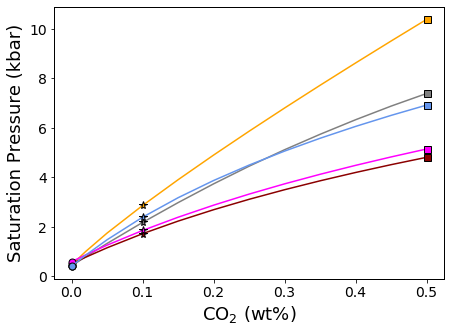

In [19]:
# Figure for all 3 CO2 contents
b=1.5
fig, (ax1) = plt.subplots(1,1, figsize=(7, 5), sharex=True) # adjust dimensions of figure here

ax1.plot(Px_new_Magmasat_2, 0.001*Py_new_Magmasat_2, '-', color='grey', linewidth=b)
ax1.plot(Px_new_Magmasat_2[0], 0.001*Py_new_Magmasat_2[0], 'ok', mfc='grey', markersize=7)

ax1.plot(Px_new_Magmasat_2[-1], 0.001*Py_new_Magmasat_2[-1], 'sk', mfc='grey', markersize=7)

ax1.plot(CO2, 0.001*Psat_Fuego_Shish_2, '-', color='orange', linewidth=b)
ax1.plot(CO2[0], 0.001*Psat_Fuego_Shish_2[0], 'ok', mfc='orange', markersize=7)
ax1.plot(CO2[-1], 0.001*Psat_Fuego_Shish_2[-1], 'sk', mfc='orange', markersize=7)


ax1.plot(CO2, 0.001*Psat_Fuego_IM_A_2, '-', color='darkred', linewidth=b)
ax1.plot(CO2[0], 0.001*Psat_Fuego_IM_A_2[0], 'ok', mfc='darkred', markersize=7)
ax1.plot(CO2[-1], 0.001*Psat_Fuego_IM_A_2[-1], 'sk', mfc='darkred', markersize=7)


ax1.plot(CO2, 0.001*Psat_Fuego_IM_H_2, '-', color='magenta', linewidth=b)
ax1.plot(CO2[0], 0.001*Psat_Fuego_IM_H_2[0], 'ok', mfc='magenta', markersize=7)
ax1.plot(CO2[-1], 0.001*Psat_Fuego_IM_H_2[-1], 'sk', mfc='magenta', markersize=7)



ax1.plot(CO2, 0.001*Psat_Fuego_Dixon_2, '-', color='cornflowerblue', linewidth=b)
ax1.plot(CO2[0], 0.001*Psat_Fuego_Dixon_2[0], 'ok', mfc='cornflowerblue', markersize=7)
ax1.plot(CO2[-1], 0.001*Psat_Fuego_Dixon_2[-1], 'sk', mfc='cornflowerblue', markersize=7)

# 1000 ppm ones so ontop
star=10
ax1.plot(Px_new_Magmasat_2[star], 0.001*Py_new_Magmasat_2[star], '*k', mfc='grey', markersize=8, lw=0.5)
ax1.plot(CO2[star], 0.001*Psat_Fuego_Shish_2[star], '*k', mfc='orange', markersize=8, lw=0.5)
ax1.plot(CO2[star], 0.001*Psat_Fuego_IM_A_2[star], '*k', mfc='darkred', markersize=8, lw=0.5)
ax1.plot(CO2[star], 0.001*Psat_Fuego_IM_H_2[star], '*k', mfc='magenta', markersize=8, lw=0.5)
ax1.plot(CO2[star], 0.001*Psat_Fuego_Dixon_2[star], '*k', mfc='cornflowerblue', markersize=8, lw=0.5)


ax1.set_xlabel('CO$_2$ (wt%)')
ax1.set_ylabel('Saturation Pressure (kbar)')